In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [9]:
from nba_api.stats.endpoints.leaguedashplayerclutch import LeagueDashPlayerClutch

In [10]:
from adjustText import adjust_text

In [11]:
headers= {
    'Host': 'stats.nba.com', 
    'Connection': 'keep-alive', 
    'Accept': 'application/json, text/plain, */*', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36', 
    'Referer': 'https://stats.nba.com/', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'en-US,en;q=0.9',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true',
}

In [12]:
seasons = [f"{season}-{str(season+1)[-2:]}" for season in range(1996, 2020)]

In [13]:
clutch_stats = []

In [14]:
per_mode = 'Totals'

In [15]:
season = '2019-20'

In [70]:
url = f"https://stats.nba.com/stats/leaguedashplayerclutch?AheadBehind=Ahead+or+Behind&ClutchTime=Last+5+Minutes&College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode={per_mode}&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&PointDiff=5&Rank=N&Season={season}&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [71]:
clutch_data = requests.get(url=url, headers=headers)

In [72]:
json_data = clutch_data.json()

In [73]:
clutch_df = pd.DataFrame(data=json_data['resultSets'][0]['rowSet'], columns=json_data['resultSets'][0]['headers'])

In [74]:
plt.style.use('fivethirtyeight')

In [75]:
clutch_df = clutch_df.loc[clutch_df.FGA > 15]

In [114]:
sorted_values = clutch_df.sort_values(by='FGA', ascending=False).iloc[:10]

In [120]:
top_eff = clutch_df.loc[clutch_df.FGA > 20].sort_values(by='FG_PCT', ascending=False).iloc[:10]
low_eff = clutch_df.sort_values(by='FG_PCT').iloc[:5]

In [121]:
concated_text = pd.concat([sorted_values, top_eff, low_eff], ignore_index=True)

159

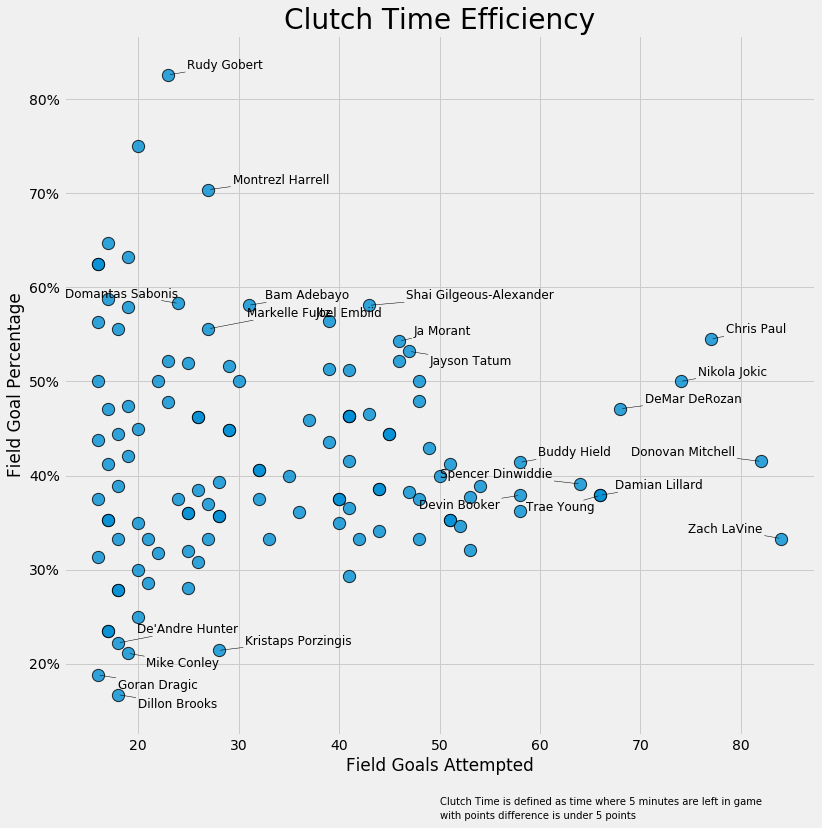

In [124]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=clutch_df.FGA, y=clutch_df.FG_PCT, s=150, edgecolors='black',alpha=0.8, lw=1.0)

ax.set_xlabel("Field Goals Attempted")
ax.set_ylabel("Field Goal Percentage")
ax.set_title("Clutch Time Efficiency", size=28)

ax.set_yticklabels([f"{item}%" for item in range(10, 90, 10)])
texts = []
player_added = []
for index in range(len(concated_text)):
    item = concated_text.iloc[index]
    if item.PLAYER_NAME not in player_added:
        texts.append(ax.text(x=item.FGA, y=item.FG_PCT, s=item.PLAYER_NAME, size=12))
        player_added.append(item.PLAYER_NAME)
    
ax.text(x=50, y=0.05, s="Clutch Time is defined as time where 5 minutes are left in game", size=10)
ax.text(x=50, y=0.035, s="with points difference is under 5 points", size=10)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'), expand_points=(1.5, 1.5))

14

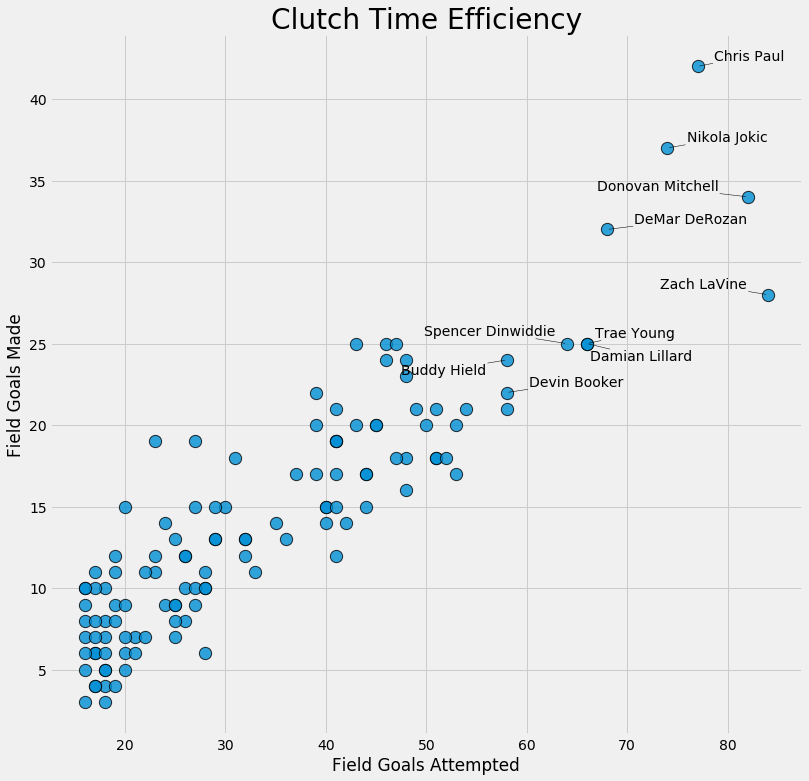

In [91]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=clutch_df.FGA, y=clutch_df.FGM, s=150, edgecolors='black',alpha=0.8, lw=1.0)

ax.set_xlabel("Field Goals Attempted")
ax.set_ylabel("Field Goals Made")
ax.set_title("Clutch Time Efficiency", size=28)

#ax.set_yticklabels()
texts = []
for index in range(len(sorted_values)):
    item = sorted_values.iloc[index]
    texts.append(ax.text(x=item.FGA, y=item.FGM, s=item.PLAYER_NAME))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'), expand_points=(1.5, 1.5))

## Per Possesion

In [92]:
url = "https://stats.nba.com/stats/leaguedashplayerclutch?AheadBehind=Ahead+or+Behind&ClutchTime=Last+5+Minutes&College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Per100Possessions&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&PointDiff=5&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [93]:
clutch_data_ = requests.get(url=url, headers=headers)

json_data = clutch_data_.json()

clutch_df_pp = pd.DataFrame(data=json_data['resultSets'][0]['rowSet'], columns=json_data['resultSets'][0]['headers'])

In [96]:
clutch_df_pp = clutch_df_pp.loc[clutch_df_pp.GP > 15]

In [97]:
clutch_df_pp = clutch_df_pp.loc[clutch_df_pp.MIN > 15]

In [98]:
clutch_df_pp = clutch_df_pp.loc[clutch_df_pp.FGA > 15]

In [105]:
sorted_values = clutch_df_pp.sort_values(by='FGA', ascending=False).iloc[:10]

205

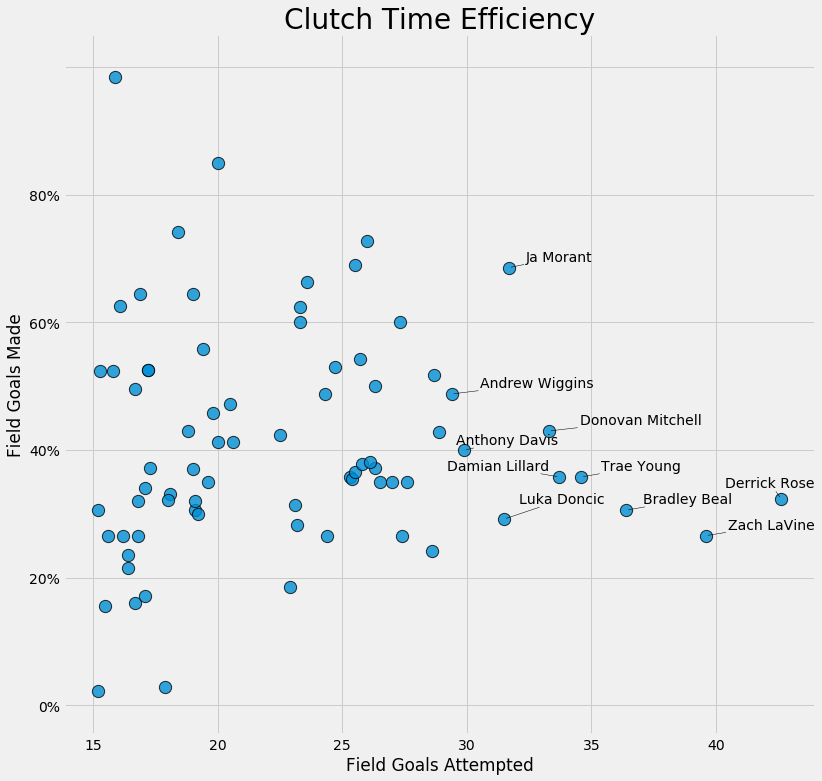

In [106]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=clutch_df_pp.FGA, y=clutch_df_pp.FG_PCT, s=150, edgecolors='black',alpha=0.8, lw=1.0)

ax.set_xlabel("Field Goals Attempted")
ax.set_ylabel("Field Goals Made")
ax.set_title("Clutch Time Efficiency", size=28)

ax.set_yticklabels([f"{item}%" for item in range(-20, 90, 20)])
texts = []
for index in range(len(sorted_values)):
    item = sorted_values.iloc[index]
    texts.append(ax.text(x=item.FGA, y=item.FG_PCT, s=item.PLAYER_NAME))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'), expand_points=(1.5, 1.5))

# All time eff

In [31]:
def get_clutchers(season, time_frame="Last+5+Minutes"):
    per_mode = 'Totals'
    #season = '2019-20'
    url = f"https://stats.nba.com/stats/leaguedashplayerclutch?AheadBehind=Ahead+or+Behind&ClutchTime={time_frame}&College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode={per_mode}&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&PointDiff=5&Rank=N&Season={season}&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="
    clutch_data = requests.get(url=url, headers=headers)
    json_data = clutch_data.json()
    clutch_df = pd.DataFrame(data=json_data['resultSets'][0]['rowSet'], columns=json_data['resultSets'][0]['headers'])
    return clutch_df

In [32]:
clutch_stats = []


In [33]:
from time import sleep
import tqdm

In [34]:
clutch_30_sec = []

In [35]:
for season in seasons:
    clutch_stats.append(get_clutchers(season))
    sleep(1)

In [36]:
concated = pd.concat(clutch_stats, ignore_index=True)

In [37]:
grouped = concated.groupby(['PLAYER_ID', 'PLAYER_NAME']).sum()

In [38]:
grouped.FG_PCT = grouped.FGM / grouped.FGA

In [39]:
sorted_top = grouped.sort_values(by='FGA', ascending=False).iloc[:10]

467

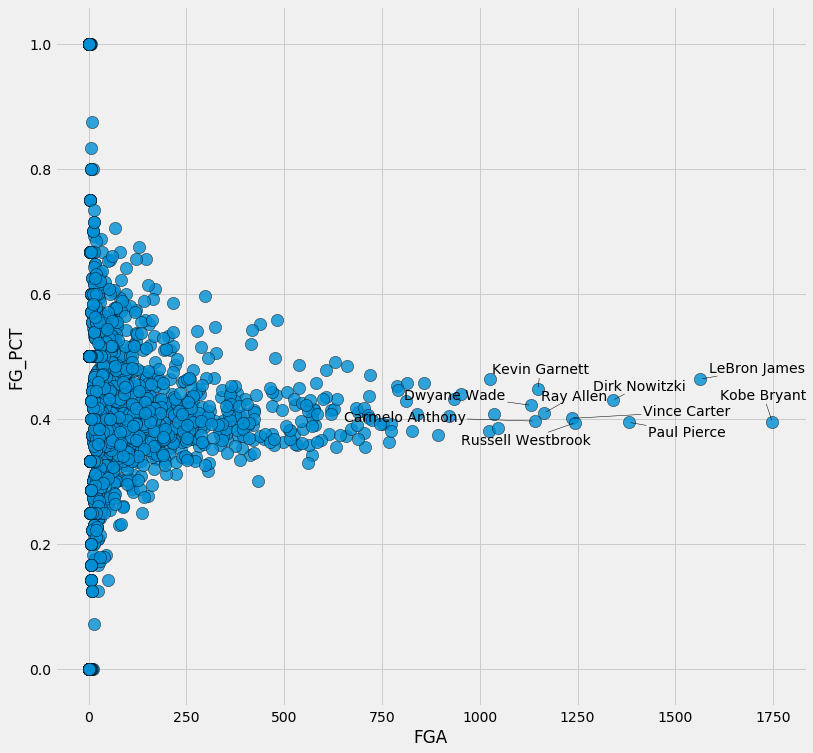

In [40]:
plt.figure(figsize=(12, 12))
plt.scatter(grouped.FGA, grouped.FG_PCT, s=150, alpha=0.8, edgecolors='black')

plt.xlabel('FGA')
plt.ylabel('FG_PCT')

texts = []
for index in range(len(sorted_top)):
    item = sorted_top.iloc[index]
    texts.append(plt.text(x=item.FGA, y=item.FG_PCT, s=item.name[1]))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'), expand_points=(1.5, 1.5))

# 30 sec only

In [101]:
clutch_30_sec = []

In [102]:
for season in seasons:
    clutch_30_sec.append(get_clutchers(season, time_frame="Last+30+Seconds"))
    sleep(1)

In [103]:
concated = pd.concat(clutch_30_sec, ignore_index=True)

grouped = concated.groupby(['PLAYER_ID', 'PLAYER_NAME']).sum()

grouped.FG_PCT = grouped.FGM / grouped.FGA

sorted_top = grouped.sort_values(by='FGA', ascending=False).iloc[:10]

157

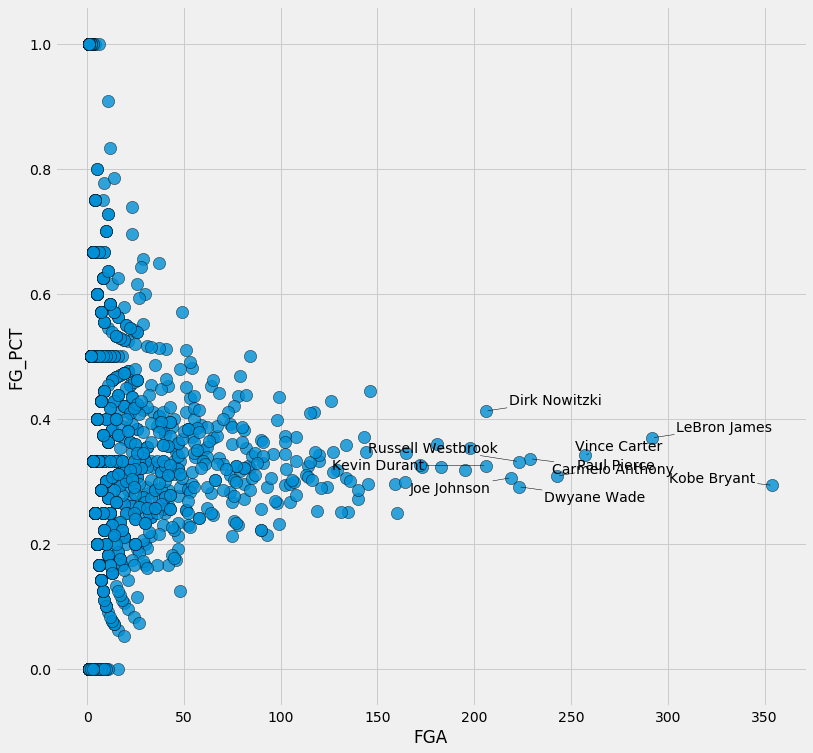

In [104]:
plt.figure(figsize=(12, 12))
plt.scatter(grouped.FGA, grouped.FG_PCT, s=150, alpha=0.8, edgecolors='black')

plt.xlabel('FGA')
plt.ylabel('FG_PCT')

texts = []
for index in range(len(sorted_top)):
    item = sorted_top.iloc[index]
    texts.append(plt.text(x=item.FGA, y=item.FG_PCT, s=item.name[1]))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'), expand_points=(1.5, 1.5))